# Section-B

Importing Required libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading Data 

In [24]:
df = pd.read_csv('Real Estate.csv')

Adding a columns of 1's into the Housing DataFrame

In [25]:
df['X7 Constant'] = np.ones(len(df))

Information about Housing DataFrame

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
 8   X7 Constant                             414 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 29.2 KB


In [27]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X7 Constant
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1.0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1.0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1.0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1.0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1.0


Features/columns present in Housing DataFrame

In [28]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'X7 Constant'],
      dtype='object')

# Solution for Q2 (a)

### Created a Custom Class for "Linear Regression Model"

The Linear Regression model has three functions:

1) testModel(): Given a Dataset x (it can be Training or Testing Data), it will predict the House price, h(x) by using its Model Parameters, w

2) costFunction(): Given the Dataset (x) and correct output label of House price (y), it will determine the Cost function of the model in the prediction of House price, h(x) and correct output price (y) 

3) rmse(): Given the Testing/Training/Validation Dataset (x), we calculate the Root Mean Square Error (RMSE) in the predicted House price output, h(x) and correct house price, y 

### Created a custom class for "Gradient Descent Algorithm"

Gradient Descent has two functions:

1) runGradientDesecentAlgorithm(): To run Gradient Desecent Algorithm on its Linear Regression Model

2) derivativeOfCostFunction(): Compute the Derivative of the Cost function of Linear Regression Model, which is used in Gradient Descent Algorithm

In [29]:
# Linear Regression Model
class LinearRegressionModel:
    def __init__(self, n) -> None:        
        # Intitializing the Linear Regression Model with model parameters (or weights) w
        self.model_parameters = np.zeros(n)

    # Test the model over the Housing Dataset, x. It basically computes House price 
    # prediction, h(x) using its model parameters, w by matrix multiplication  
    def testModel(self, x):
        y_test = np.dot(x, self.model_parameters)
        return y_test

    # Calculate the Cost function, J(h) of the model in the prediction of House price, h(x) 
    def costFunction(self, x, y):
        m = len(x)
        prediction_error = self.testModel(x) - y
        cost_function_value = np.dot(prediction_error.T, prediction_error) / (2*m)
        return cost_function_value
    
    # Root Mean Square Error is Square root of twice of Cost function
    def rmse(self, x, y):
        return np.sqrt(2 * self.costFunction(x, y))
    
    # Train the Model on the Testing Dataset (x_train,y_train)
    def trainModel(self, x_train, y_train, x_test, y_test):
        algorithm = GradientDescent(0.03)
        return algorithm.runGradientDesecentAlgorithm(self, x_train, y_train, x_test, y_test)


# Gradient Descent
class GradientDescent:
    def __init__(self, learningRate) -> None:
        self.alpha = learningRate       # Learning parameter of the the Gradient Descent Algorithm
    
    # Run Gradient Desecent Algorithm on given model 
    def runGradientDesecentAlgorithm(self, model: LinearRegressionModel, x_train, y_train, x_test, y_test):
        error = 1e-5            # Accuracy we want in Cost Function of model and its local/global minima 
        difference = 1e5        
        cost = 1e5

        # Store all the values of RMSE, to be used for plotting
        training_rmse = []
        validation_rmse = []

        # Run gradient descent algorithm, while we didn't acheive the accuracy we want in Cost Function of 
        # model and local/global minima
        while difference > error:
            # θj  =  θj  -  α * dJ(θ)/dθj
            model.model_parameters = model.model_parameters - self.alpha * self.derivativeOfCostFunction(
                model, x_train, y_train)        
            new_cost = model.costFunction(x_train, y_train)
            difference = abs(cost - new_cost)
            cost = new_cost

            training_rmse.append(model.rmse(x_train, y_train))
            validation_rmse.append(model.rmse(x_test, y_test))
        
        return training_rmse,validation_rmse


    # Compute the Derivative of the Cost function of Linear Regression Model, which is used in 
    # Gradient Descent Algorithm
    def derivativeOfCostFunction(self, model: LinearRegressionModel, x_train, y_train):
        prediction_error = model.testModel(x_train) - y_train
        derivative_of_cost_function = np.dot(x_train.T, prediction_error) / len(x_train)
        return derivative_of_cost_function 

### Creates the Dataset of Training and Testing set for each value of 'k' in "K-Fold cross-validation"

In [30]:
# Function to get the Training and Testing Data for each iteration of 'k' in K-Fold cross-validation

def getTrainAndTestData(fold, fold_size):
        # Calculate the Training and Testing Data inputs and outputs
        x_train = df.drop(np.arange((fold - 1) * fold_size, fold * fold_size), axis=0)
        x_test = df.iloc[(fold - 1) * fold_size : fold * fold_size]
        y_train = x_train['Y house price of unit area']
        y_test = x_test['Y house price of unit area']

        # Drroping Output labels from Training & Testing Dataset 
        x_train = x_train.drop(['Y house price of unit area', 'No'], axis=1)
        x_test = x_test.drop(['Y house price of unit area', 'No'], axis=1)

        # Renaming Indices (starting from 0) 
        x_train.index = np.arange(len(x_train))
        y_train.index = np.arange(len(y_train))
        x_test.index = np.arange(len(x_test))
        y_test.index = np.arange(len(y_test))

        # Normalizing Training Data: For each feature/columns in Dataset, 
        # we normalize their values to make their ranges in similar scale. 
        # Operation performed:
        # feature = (feature - feature.mean()) / feature.std() 
        for i in range(len(x_train.columns)):
            feature = x_train.columns[i]
            x_train[feature] = (x_train[feature] - x_train[feature].mean()) / x_train[feature].std() 
        x_train['X7 Constant'] = np.ones(len(x_train))

        # Normalizing Test Data similar to I did in Training Data
        for i in range(len(x_test.columns)):
            feature = x_test.columns[i]
            x_test[feature] = (x_test[feature] - x_test[feature].mean()) / x_test[feature].std()
        x_test['X7 Constant'] = np.ones(len(x_test))

        return x_train, y_train, x_test, y_test    

### Conclusion after performing K-Fold cross-validation on the Given Dataset 

In [31]:
def performKFoldCrossValidation(k):
    fold_size = len(df) // k         # size of Dataset in each fold of size 'k'
    train_error = 0                  # Training error
    test_error = 0                   # Testing error
        
    # For each value of 'k', creates 'k' different Training Dataset
    for fold in range(1,k+1):
        # Training and Testing set for the given value of 'k-fold'
        x_train, y_train, x_test, y_test = getTrainAndTestData(fold, fold_size)
        
        # initialize a Linear regression model
        linear_reg_model = LinearRegressionModel(len(x_train.columns))     

        # Train the Model
        linear_reg_model.trainModel(x_train, y_train, x_test, y_test)
                
        # Add the Training and Testing error, and take average at the end  
        train_error += linear_reg_model.rmse(x_train, y_train)
        test_error += linear_reg_model.rmse(x_test, y_test)
        
    print(f"Mean Training RMSE with k = {k} is:  {(train_error/k):.8f}")
    print(f"Mean Testing RMSE with k = {k} is:  {(test_error/k):.8f}")
    print()


# Perform K-Fold cross-validation for the follwing values of 'k' 
for k in [2,3,4,5]:
    performKFoldCrossValidation(k)

print("Since the Root Mean Square Error for all values of 'k' in K-Fold cross-validation is nearly same.")
print("Though, the Root Mean Square Error is less for 'k' = 5")
print("Also the size of Dataset is medium size, so the value of 'k' chosen is : \"k = 5\"")

Mean Training RMSE with k = 2 is:  8.71081323
Mean Testing RMSE with k = 2 is:  8.81556603

Mean Training RMSE with k = 3 is:  8.74818277
Mean Testing RMSE with k = 3 is:  8.85179424

Mean Training RMSE with k = 4 is:  8.75062507
Mean Testing RMSE with k = 4 is:  8.78252722

Mean Training RMSE with k = 5 is:  8.76099056
Mean Testing RMSE with k = 5 is:  8.76419154

Since the Root Mean Square Error for all values of 'k' in K-Fold cross-validation is nearly same.
Though, the Root Mean Square Error is less for 'k' = 5
Also the size of Dataset is medium size, so the value of 'k' chosen is : "k = 5"


# Solution for Q2 (b)

### Plotting the Training and Validation RMSE while Training the model, using Gradient Descent Algorithm 

The optimal value of K chosen for 'K-Fold cross-validation' is : 5 

The optimal value of K chosen for 'K-Fold cross-validation' is : 5 

After Training the Model number 1...
The RMSE Training Error : 9.15897420054323
The RMSE Validation Error : 7.129526728326279

After Training the Model number 2...
The RMSE Training Error : 8.649500518278767
The RMSE Validation Error : 9.434016005879107

After Training the Model number 3...
The RMSE Training Error : 9.044525967449207
The RMSE Validation Error : 7.773591870709944

After Training the Model number 4...
The RMSE Training Error : 7.9374974597378865
The RMSE Validation Error : 11.60625668497562

After Training the Model number 5...
The RMSE Training Error : 9.014454634960437
The RMSE Validation Error : 7.877566408936



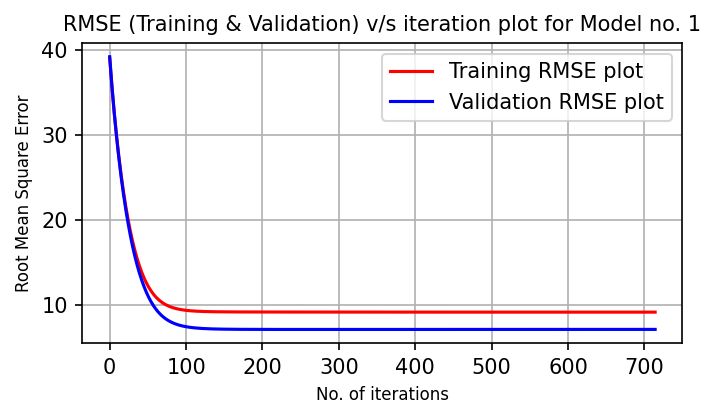

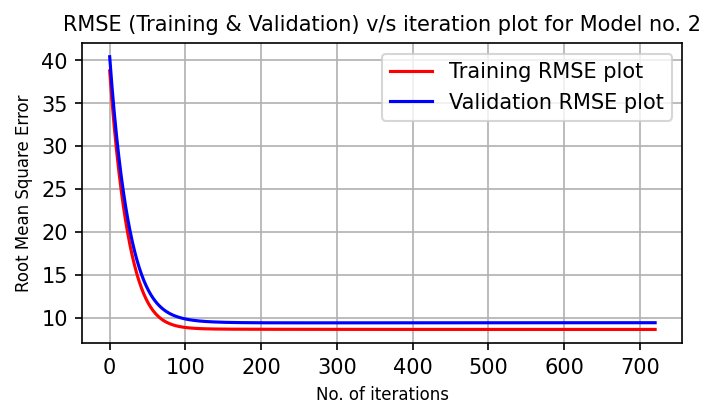

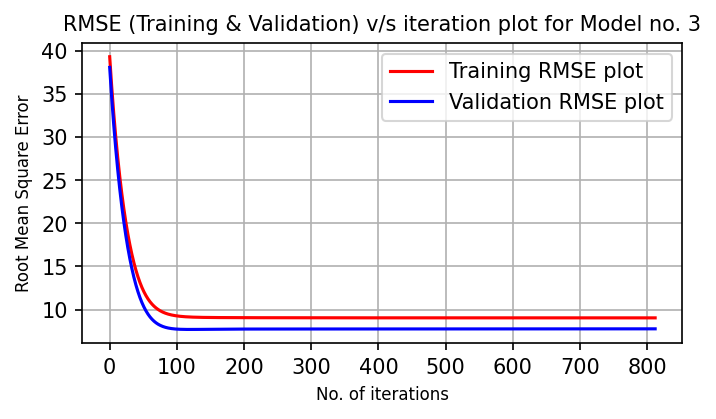

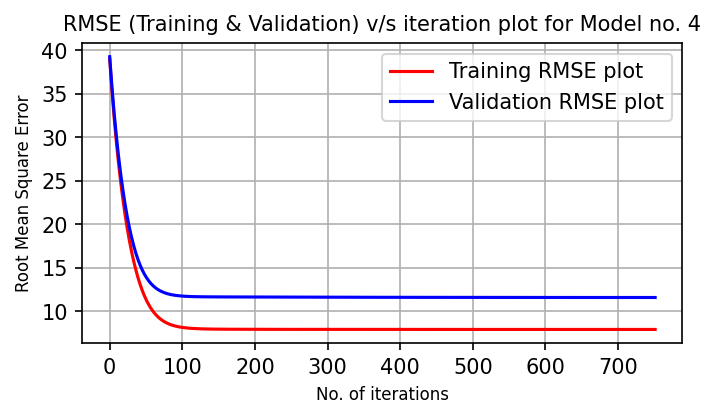

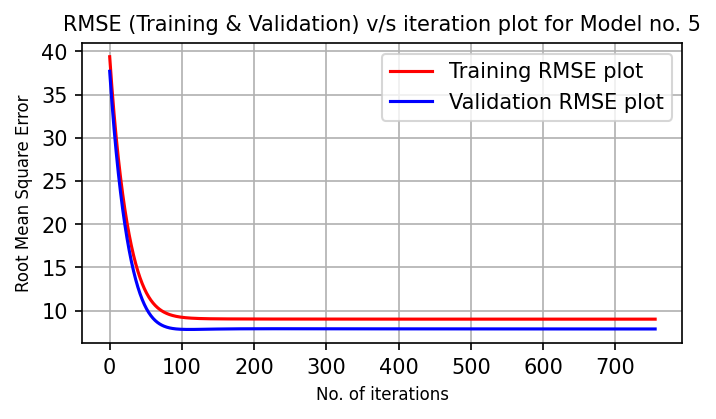

In [32]:
def plot_RMSE_for_Training_and_Validation(k):
    fold_size = len(df) // k         # size of Dataset in each fold of size 'k'
        
    # Creates 'k' different Training & Validation Dataset
    for fold in range(1, k+1):
        # Training and Validation set for the each fold
        x_train, y_train, x_valid, y_valid = getTrainAndTestData(fold, fold_size)
        
        # initialize a Linear regression model
        linear_reg_model = LinearRegressionModel(len(x_train.columns))     

        # Train Model and run gradient descent algorithm it, to find its Model parameters, w
        train_rmse, validation_rmse = linear_reg_model.trainModel(x_train, y_train, x_valid, y_valid)

        # RMSE of Training & Validation set for each model trained                
        print(f"After Training the Model number {fold}...")
        print(f"The RMSE Training Error : {linear_reg_model.rmse(x_train, y_train)}")
        print(f"The RMSE Validation Error : {linear_reg_model.rmse(x_valid, y_valid)}")
        print()

        # Plotting Training and Validation RMSE
        fig = plt.figure(figsize=(4,2), dpi=150)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(train_rmse, 'r-',label='Training RMSE plot')
        axes.plot(validation_rmse, 'b-',label='Validation RMSE plot')
        axes.set_title(f"RMSE (Training & Validation) v/s iteration plot for Model no. {fold}", fontsize=10)
        axes.set_xlabel(f'No. of iterations', fontsize=8)
        axes.set_ylabel('Root Mean Square Error', fontsize=8)
        axes.legend()
        axes.grid(True)

# optimal value of K for "K-Fold cross-validation" chosen is 5
k = 5
print(f"The optimal value of K chosen for 'K-Fold cross-validation' is : {k} \n")
plot_RMSE_for_Training_and_Validation(k=k)

# Solution for Q2 (c)

### Implementing Ridge Regression

In code, Ridge Regularization for Linear Regression Model is inherited from the earlier Linear Regression class. Only neccessary methods (for Cost function, RMSE calculation, Training model) have been overridden.


Similarly, Ridge Regularization for Gradient Descent is inherited from the earlier Gradient Descent class. Only one neccessary method (for calculating Derivative of Cost function) is overridden.

In [39]:
# Linear Model for Ridge Regression
class LinearRegressionModel_Ridge(LinearRegressionModel):
    def __init__(self, n, λ) -> None:        
        super().__init__(n)
        self.λ = λ           # Lambda parameter for Ridge Linear Regression 

    # Only these methods will change in Ridge Regularization
    # Calculate the Cost function, J(h) of the model in the prediction of House price, h(x)
    def costFunction(self, x, y):
        # Penaly term in Ridge Regression
        penalty_cost_function = self.λ * np.dot(self.model_parameters.T, self.model_parameters)
        return super().costFunction(x, y) + penalty_cost_function
    
    # Root Mean Square Error same as the Square root of twice of Cost function
    def rmse(self, x, y):
        return np.sqrt(2 * super().costFunction(x, y))
    
    # Train the Model on the Testing Dataset (x_train,y_train)
    def trainModel(self, x_train, y_train, x_test, y_test):
        algorithm = GradientDescent_Ridge(0.03)
        return algorithm.runGradientDesecentAlgorithm(self, x_train, y_train, x_test, y_test)


# Gradient Descent for Ridge Linear Regression
class GradientDescent_Ridge(GradientDescent):
    def __init__(self, learningRate) -> None:
        super().__init__(learningRate)

    # Compute the Derivative of the Cost function of Linear Regression Model, which is used in 
    # Gradient Descent Algorithm. Only this method will change in Ridge Regularization 
    def derivativeOfCostFunction(self, model: LinearRegressionModel_Ridge, x_train, y_train):
        prediction_error = model.testModel(x_train) - y_train
        derivative_of_cost_function = np.dot(x_train.T, prediction_error) / len(x_train)
        derivative_of_cost_function += 2 * model.λ * model.model_parameters
        return derivative_of_cost_function 

******************** Tuning Parameter, λ in Ridge Regression: 1 ***********************
After Training the Model number 1...
The RMSE Training Error : 27.3380
The RMSE Validation Error : 27.2026

After Training the Model number 2...
The RMSE Training Error : 27.0315
The RMSE Validation Error : 28.6983

After Training the Model number 3...
The RMSE Training Error : 27.4816
The RMSE Validation Error : 26.0961

After Training the Model number 4...
The RMSE Training Error : 27.0702
The RMSE Validation Error : 27.8281

After Training the Model number 5...
The RMSE Training Error : 27.5078
The RMSE Validation Error : 25.8000

******************** Tuning Parameter, λ in Ridge Regression: 0.1 ***********************
After Training the Model number 1...
The RMSE Training Error : 11.1974
The RMSE Validation Error : 9.8842

After Training the Model number 2...
The RMSE Training Error : 10.7637
The RMSE Validation Error : 12.2180

After Training the Model number 3...
The RMSE Training Error : 11.1

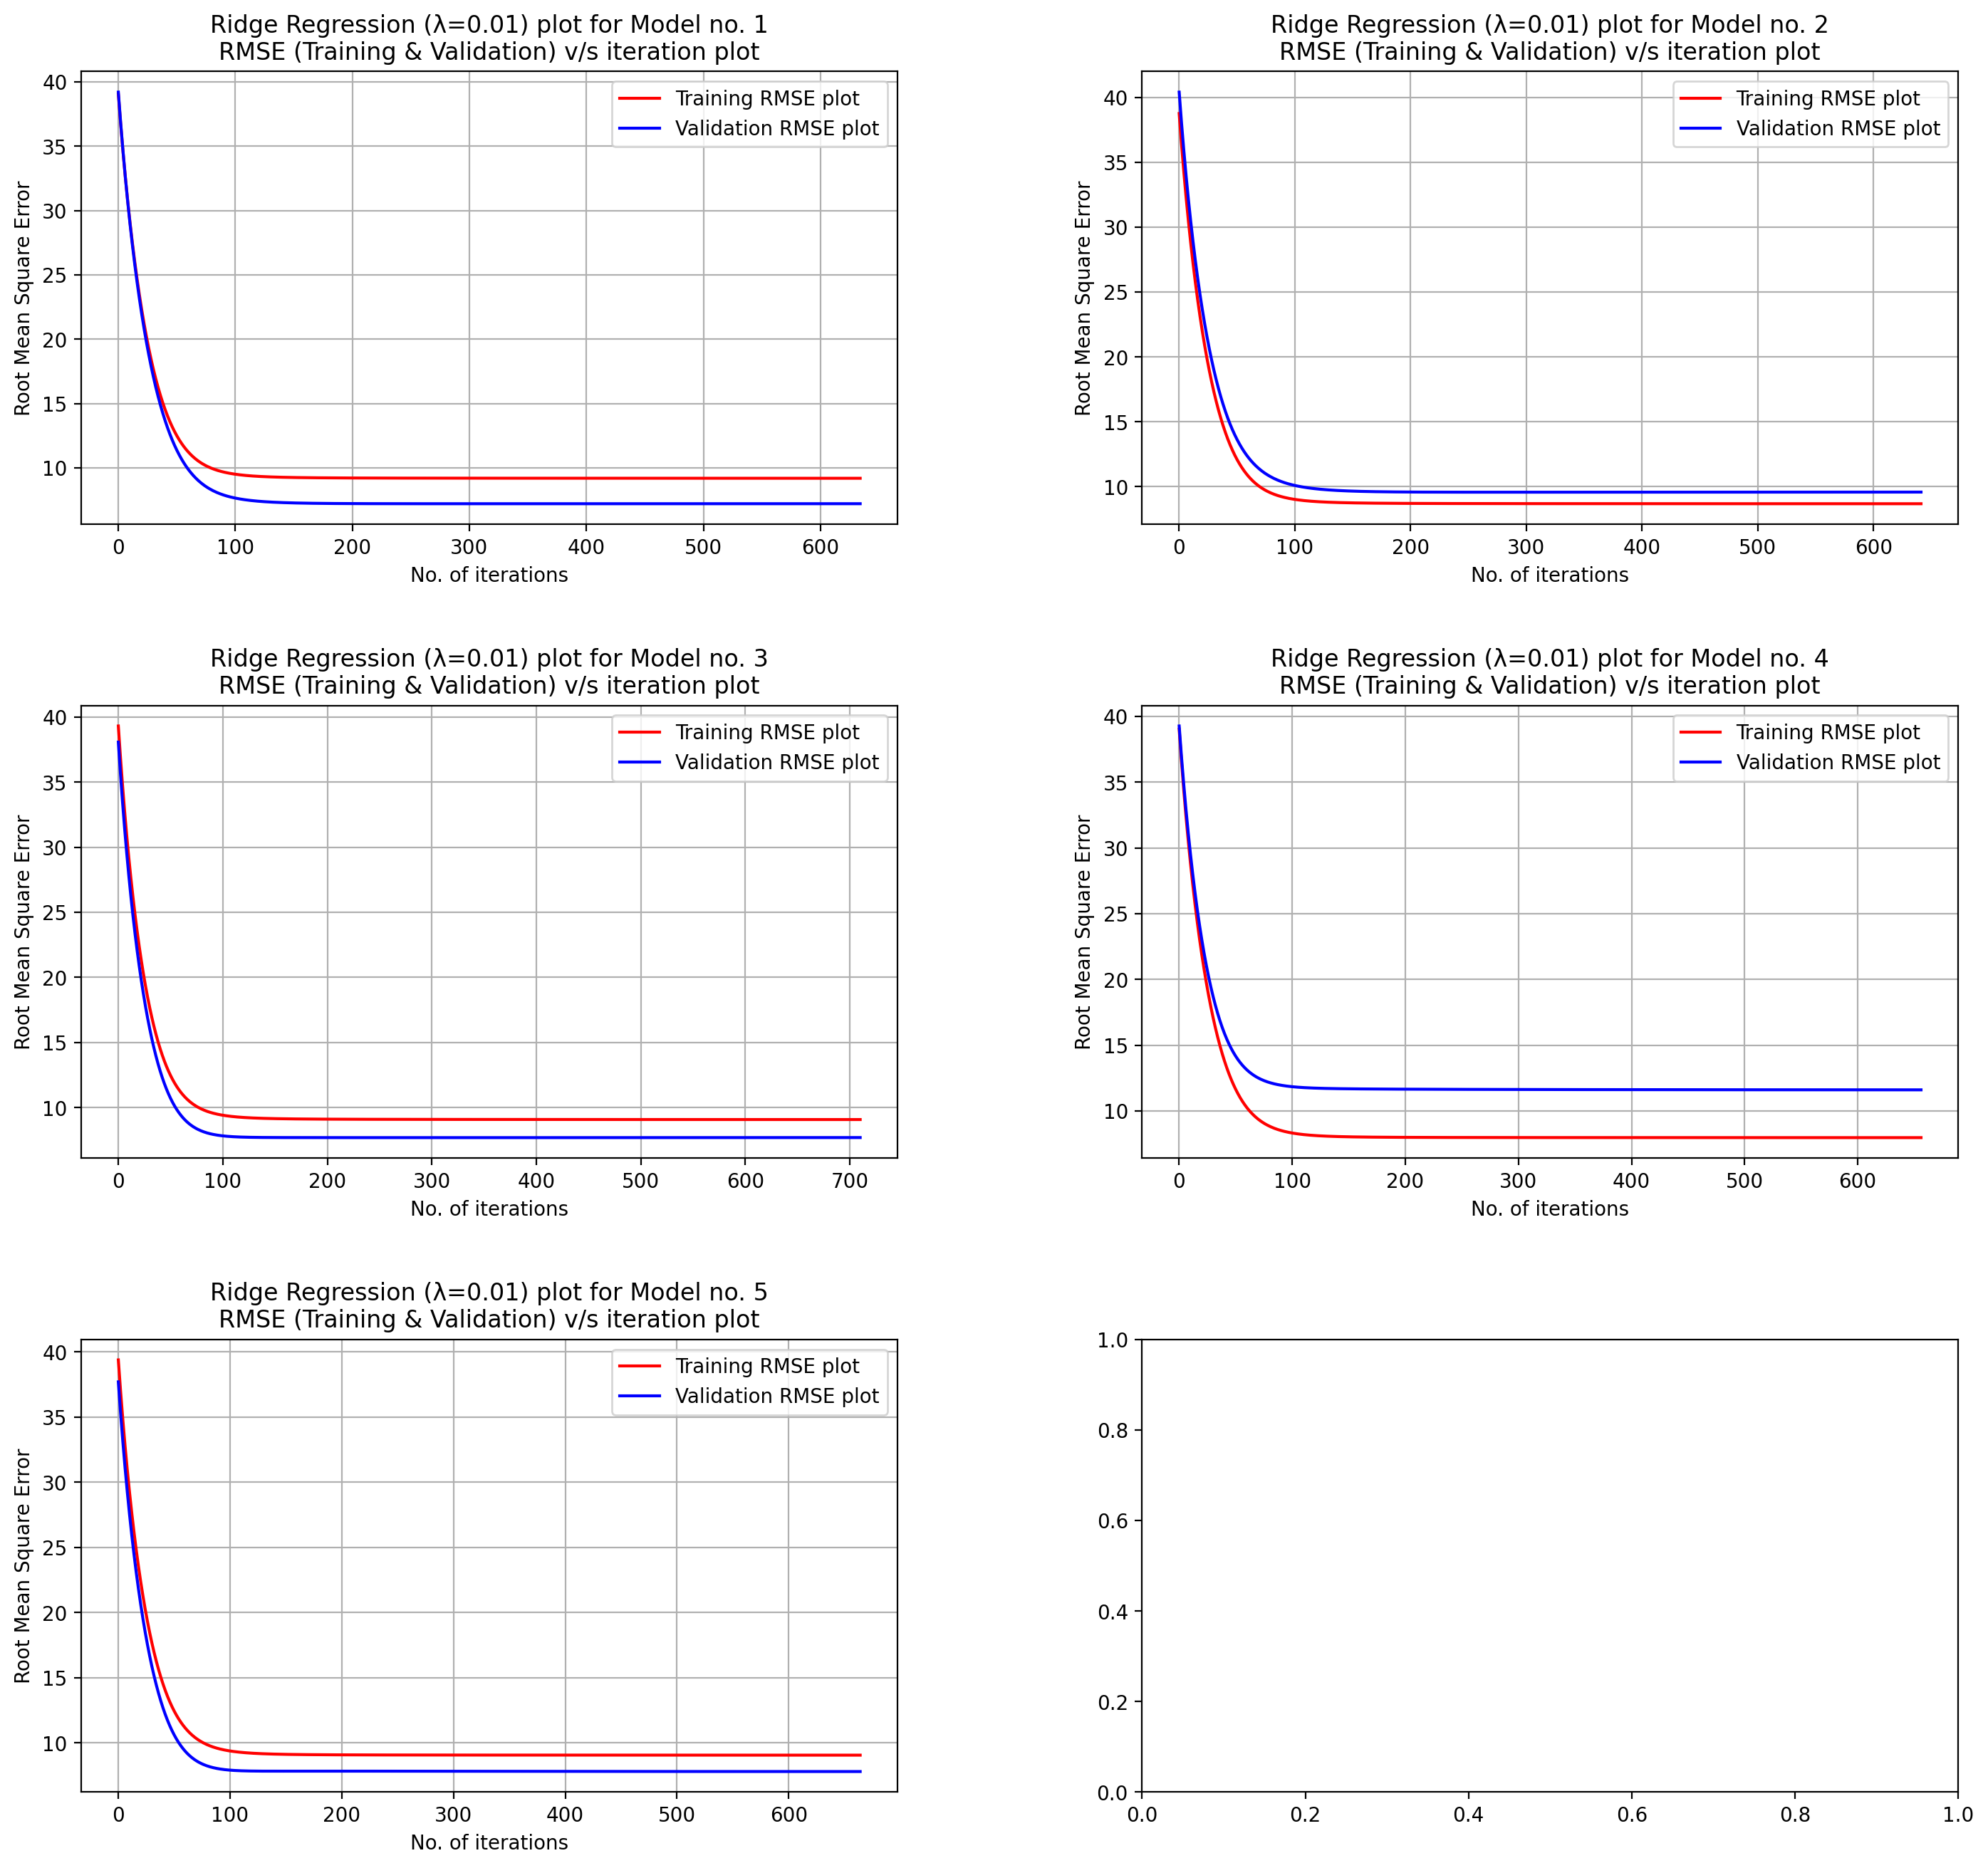

In [54]:
def plot__Training_and_Validation_RMSE_for_Ridge_Regression(k, λ):
    print("******************** Tuning Parameter, λ in Ridge Regression:", λ, "***********************")
    fold_size = len(df) // k         # size of Dataset in each fold of size 'k'

    global train_rmse, validation_rmse
    train_rmse, validation_rmse = [], []
        
    # Creates 'k' different Training & Validation Dataset
    for fold in range(1, k+1):
        # Training and Validation set for the each fold
        x_train, y_train, x_valid, y_valid = getTrainAndTestData(fold, fold_size)
        
        # initialize a Linear regression model
        ridge_reg_model = LinearRegressionModel_Ridge(len(x_train.columns), λ)     

        # Train Model and run gradient descent algorithm it, to find its Model parameters, w
        __train_rmse, __validation_rmse = ridge_reg_model.trainModel(x_train, y_train, x_valid, y_valid)
        train_rmse.append(__train_rmse)
        validation_rmse.append(__validation_rmse)

        # RMSE of Training & Validation set for each model trained                
        print(f"After Training the Model number {fold}...")
        print(f"The RMSE Training Error : {ridge_reg_model.rmse(x_train, y_train):.4f}")
        print(f"The RMSE Validation Error : {ridge_reg_model.rmse(x_valid, y_valid):.4f}")
        print()


# RMSE for Training and Validation set
train_rmse, validation_rmse = [], []

# optimal value of K for "K-Fold cross-validation" chosen is 5
k = 5
λ = [1, 0.1, 0.01]
for lambda_ in λ: 
    plot__Training_and_Validation_RMSE_for_Ridge_Regression(k=k, λ=lambda_)

print("\nConclusion:")
print("So, after the tuning various values of Regularization parameter, λ.")
print("The value of λ which gives least RMSE and the least variance in all the models is: ", λ[-1],"\n")
print("Plots for RMSE (Training + Validation) v/s iterations for best value of Regularization parameter, λ")

# Subplot for RMSE for Best value of Hyperparamter, λ
fig, axes = plt.subplots(3, 2, dpi=200, figsize=(17,16))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
for i in range(k):
    axes[i//2][i%2].plot(train_rmse[i], 'r-',label='Training RMSE plot')
    axes[i//2][i%2].plot(validation_rmse[i], 'b-',label='Validation RMSE plot')
    axes[i//2][i%2].set_title(f'''Ridge Regression (λ={λ[-1]}) plot for Model no. {i+1}
RMSE (Training & Validation) v/s iteration plot''')
    axes[i//2][i%2].set_xlabel(f'No. of iterations')
    axes[i//2][i%2].set_ylabel('Root Mean Square Error')
    axes[i//2][i%2].legend()
    axes[i//2][i%2].grid(True)

### Reguralization used: LASSO Regression

In [35]:
# Linear Model for LASSO Regression
class LinearRegressionModel_LASSO(LinearRegressionModel):
    def __init__(self, n, λ) -> None:        
        super().__init__(n)
        self.λ = λ           # Lambda parameter for LASSO Linear Regression 

    # Calculate the Cost function, J(h) of the model in the prediction of House price, h(x)
    def costFunction(self, x, y):
        # Penaly term in LASSO Regression
        penalty_cost_function = self.λ * np.sum(np.abs(self.model_parameters))
        return super().costFunction(x, y) + penalty_cost_function
    
    # Root Mean Square Error is Square root of twice of Cost function
    def rmse(self, x, y):
        return np.sqrt(2 * super().costFunction(x, y))
    
    # Train the Model on the Testing Dataset (x_train,y_train)
    def trainModel(self, x_train, y_train, x_test, y_test):
        algorithm = GradientDescent_LASSO(0.03)
        return algorithm.runGradientDesecentAlgorithm(self, x_train, y_train, x_test, y_test)


# TODO: LASSO Regression Gradient Descent
# Gradient Descent for LASSO Linear Regression
class GradientDescent_LASSO(GradientDescent):
    def __init__(self, learningRate) -> None:
        super().__init__(learningRate)
            
    # Run Gradient Desecent Algorithm on given model 
    def runGradientDesecentAlgorithm(self, model: LinearRegressionModel_LASSO, x_train, y_train, x_test, y_test):
        return super().runGradientDesecentAlgorithm(model, x_train, y_train, x_test, y_test)

    # Compute the Derivative of the Cost function of Linear Regression Model, which is used in Gradient Descent Algorithm
    def derivativeOfCostFunction(self, model: LinearRegressionModel_LASSO, x_train, y_train):
        prediction_error = model.testModel(x_train) - y_train
        derivative_of_cost_function = np.dot(x_train.T, prediction_error) / len(x_train)
        derivative_of_cost_function += 2 * model.λ * model.model_parameters
        return derivative_of_cost_function 

# Solution for Q2 (d)

### Normal Equation:

Given Training Dataset, x and its output label y.

Its model parameters, w are given by:  

 w = inverse((X.transpose * X)) * (X.transpose * Y)

In [36]:
# Optimal value of k is 5
k = 5
print(f"The optimal value of K chosen for 'K-Fold cross-validation' is : {k} \n")

# Stores the average of the Validation RMSE error for all the 'k' models
validation_rmse = 0

# Creates 'k' different Training & Validation Dataset, and Train & Validate on them
for fold in range(1,k+1):
    # Training and Validation set for the each fold
    x_train, y_train, x_valid, y_valid = getTrainAndTestData(fold, len(df) // k)

    # Model parameters, w in normal equation is given by: w = inverse((X.T * X)) * (X.T * Y)
    model_parameters = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y_train))
    
    # Predicted value of output of Validation set = h(x)
    y_valid_predicted = np.dot(x_valid, model_parameters)

    # Predicted error = difference of predicted value and actual value  = h(x) - y_valid
    prediction_error = y_valid_predicted - y_valid
    
    # RMSE = (sum_over_all_samples(square_of_prediction_error))^0.5
    RMSE = np.sqrt(np.dot(prediction_error.T, prediction_error) / len(y_valid))
    
    print(f"Training Model number {fold}...")
    print(f"The RMSE Validation Error : {(RMSE):.4f}")
    print()
    
    # Sum up all the RMSE (to take average later)
    validation_rmse += RMSE

print(f"The average of RMSE Validation Error for all models is: {(validation_rmse / k):.4f}")

The optimal value of K chosen for 'K-Fold cross-validation' is : 5 

Training Model number 1...
The RMSE Validation Error : 7.1312

Training Model number 2...
The RMSE Validation Error : 9.4368

Training Model number 3...
The RMSE Validation Error : 7.7777

Training Model number 4...
The RMSE Validation Error : 11.6010

Training Model number 5...
The RMSE Validation Error : 7.8752

The average of RMSE Validation Error for all models is: 8.7644
